
não existe treinamento de ia com texto, tem  que fazer a abordagem de transformação, transformar object que é string em número para a ia treinar

## Tratando dados string para ML

Usamos duas técnicas para isso
- dummys
    -  transforma em 0 e 1, bom para duas opções, se tiver muitas opções na série serão gerados mais series o que pode não ser muito bom para treinar ia já que o treinamento fica mais custoso, a ia vai demorar mais aprender
- one hot encoding

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)


In [2]:
df = pd.read_excel('./dados.xlsx')

In [3]:
df = pd.read_csv('./dados.csv')

In [4]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [5]:
df.tail()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
981,HONDA FIT,12.0,4,1700,116,AUTOMATICO,EUA
982,PALIO,11.0,4,1700,118,MANUAL,ESPANHA
983,UNO,13.5,4,1700,118,MANUAL,CANADA
984,MOBI,14.0,4,1700,118,MANUAL,INGLATERRA
985,PASSAT,8.0,6,1800,118,MANUAL,ALEMANHA


In [6]:
df['PAIS'].value_counts()

PAIS
BRASIL        99
EUA           99
ESPANHA       99
CANADA        99
INGLATERRA    99
ALEMANHA      99
AUSTRALIA     98
NORUEGA       98
BELGICA       98
HOLANDA       98
Name: count, dtype: int64

In [7]:
df.groupby('TRANSMISSAO').size()

TRANSMISSAO
AUTOMATICO    536
MANUAL        450
dtype: int64

In [8]:
df.groupby('MODELO').size()

MODELO
ASTON MARTIN     66
BMW X1           30
BMW X5           36
COROLLA          36
CORSA            42
CRETA            36
FERRARI          54
GOL              24
HB20             30
HONDA FIT        66
JEEP COMPASS     36
JEEP RENEGADE    24
LABORGUINI       50
MERCEDES SL80    66
MOBI             66
PAJERO           36
PALIO            66
PARATI           24
PASSAT           66
SAVEIRO          42
UNO              66
VECTRA           24
dtype: int64

## Método Dummy

transforma as possibilidadde de uma variável categórica em séries binarias

In [9]:
df_dummy = pd.get_dummies(df)

In [10]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   KM-LITRO                984 non-null    float64
 1   CILINDROS               986 non-null    int64  
 2   PESO(KG)                986 non-null    int64  
 3   CAVALOS                 986 non-null    int64  
 4   MODELO_ASTON MARTIN     986 non-null    bool   
 5   MODELO_BMW X1           986 non-null    bool   
 6   MODELO_BMW X5           986 non-null    bool   
 7   MODELO_COROLLA          986 non-null    bool   
 8   MODELO_CORSA            986 non-null    bool   
 9   MODELO_CRETA            986 non-null    bool   
 10  MODELO_FERRARI          986 non-null    bool   
 11  MODELO_GOL              986 non-null    bool   
 12  MODELO_HB20             986 non-null    bool   
 13  MODELO_HONDA FIT        986 non-null    bool   
 14  MODELO_JEEP COMPASS     986 non-null    bo

In [11]:
df_dummy.shape

(986, 38)

In [ ]:
df_dummy.head(
)

In [13]:
df_dummy_transmissao = pd.get_dummies(df['TRANSMISSAO'])
df_dummy_transmissao.head()

,AUTOMATICO,MANUAL
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [14]:
df_completo = pd.concat([df, df_dummy_transmissao], axis =1)

df_completo.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS,AUTOMATICO,MANUAL
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL,True,False
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA,True,False
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA,True,False
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA,True,False
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA,True,False


In [ ]:
df_completo.drop(columns=['TRANSMISSAO'])

## Método One Hot Encoding

usaremos a scikit-learn para esta tecnica

In [16]:
df = pd.read_csv('dados.csv')

In [17]:
df.shape

(986, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    object 
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    object 
 6   PAIS         986 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.1+ KB


In [19]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,LABORGUINI,3.0,12,1200,700,AUTOMATICO,BRASIL
1,LABORGUINI,3.0,12,1200,700,AUTOMATICO,EUA
2,LABORGUINI,3.0,12,1200,700,AUTOMATICO,ESPANHA
3,FERRARI,3.0,12,1400,640,AUTOMATICO,CANADA
4,ASTON MARTIN,3.5,10,1600,620,AUTOMATICO,INGLATERRA


In [20]:
from sklearn.preprocessing import LabelEncoder


In [21]:
# o comando do for foi feito dessa maneira para não se criar outras colunas pega transforma pais em numero e depois volta esse numero na coluna país
lb = LabelEncoder()

for serie in ['PAIS', 'TRANSMISSAO', 'MODELO']:
    df[serie] = lb.fit_transform(df[serie])

In [22]:
df.shape

(986, 7)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MODELO       986 non-null    int64  
 1   KM-LITRO     984 non-null    float64
 2   CILINDROS    986 non-null    int64  
 3   PESO(KG)     986 non-null    int64  
 4   CAVALOS      986 non-null    int64  
 5   TRANSMISSAO  986 non-null    int64  
 6   PAIS         986 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 54.1 KB


In [23]:
df.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,12,3.0,12,1200,700,0,3
1,12,3.0,12,1200,700,0,6
2,12,3.0,12,1200,700,0,5
3,6,3.0,12,1400,640,0,4
4,0,3.5,10,1600,620,0,8


In [24]:
df.groupby('PAIS').value_counts()

PAIS  MODELO  KM-LITRO  CILINDROS  PESO(KG)  CAVALOS  TRANSMISSAO
0     13      4.5       8          1700      480      0              8
      18      8.0       6          1800      118      1              8
      6       3.0       12         1400      640      0              7
      16      11.0      4          1700      118      1              7
      9       12.0      4          1700      116      0              6
      14      14.0      4          1700      118      1              6
      20      13.5      4          1700      118      1              6
      0       3.5       10         1600      620      0              5
      3       13.0      6          2600      190      0              4
      4       9.0       4          1900      118      1              4
      5       8.0       4          2500      118      0              4
      8       9.0       3          2100      118      1              4
      10      4.5       6          2800      250      0              4
      11   

In [25]:
df_dados = pd.read_excel('dados.xlsx')

legendas = {}

for var in ['PAIS', 'TRANSMISSAO', 'MODELO']:
    lb = LabelEncoder()

    dados_originais = df_dados[var].copy()

    df_dados[var] = lb.fit_transform(dados_originais)

    legenda_var = dict(zip(lb.classes_, lb.transform(lb.classes_)))
    legendas[var] = legenda_var

for var, mapa in legendas.items():
    print(f'\n Legenda para {var}:')
    for k,v in mapa.items():
        print(f'{k}: {v}')


 Legenda para PAIS:
ALEMANHA: 0
AUSTRALIA: 1
BELGICA: 2
BRASIL: 3
CANADA: 4
ESPANHA: 5
EUA: 6
HOLANDA: 7
INGLATERRA: 8
NORUEGA: 9

 Legenda para TRANSMISSAO:
AUTOMATICO: 0
MANUAL: 1

 Legenda para MODELO:
ASTON MARTIN: 0
BMW X1: 1
BMW X5: 2
COROLLA: 3
CORSA: 4
CRETA: 5
FERRARI: 6
GOL: 7
HB20: 8
HONDA FIT: 9
JEEP COMPASS: 10
JEEP RENEGADE: 11
LABORGUINI: 12
MERCEDES SL80: 13
MOBI: 14
PAJERO: 15
PALIO: 16
PARATI: 17
PASSAT: 18
SAVEIRO: 19
UNO: 20
VECTRA: 21


In [26]:
import pandas as pd
from pandas.profiling import ProfileReport

df2 = pd.read_excel('dados.xlsx')

doc = ProfileReport()

doc.to_file(output='analise.html')

ModuleNotFoundError: No module named 'pandas.profiling'

In [ ]:
# overfiting = ele vai decorar ele não vai aprender, tem que colocar todo mundo na mesma escala, senão ele vai pegar a escala do maior e o menor vai ficar debilitado
# algoritmo KMN, o scikit learn vai fazer de forma automática, ele faz por aproximação, ele coloca do que é mais perto, nem sempre é bom colocar o muitos k vizinhos para frente ou para baixo,
# o algoritmo vai tender a memorizar, mais k analisado não significa que ficará melhor
# o python faz o cálculo e me diz a resposta, ele faz o cálculo de tudo e te devolve, o que vale mais a pena saber e o que significa o algoritmo e para que serve

In [27]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

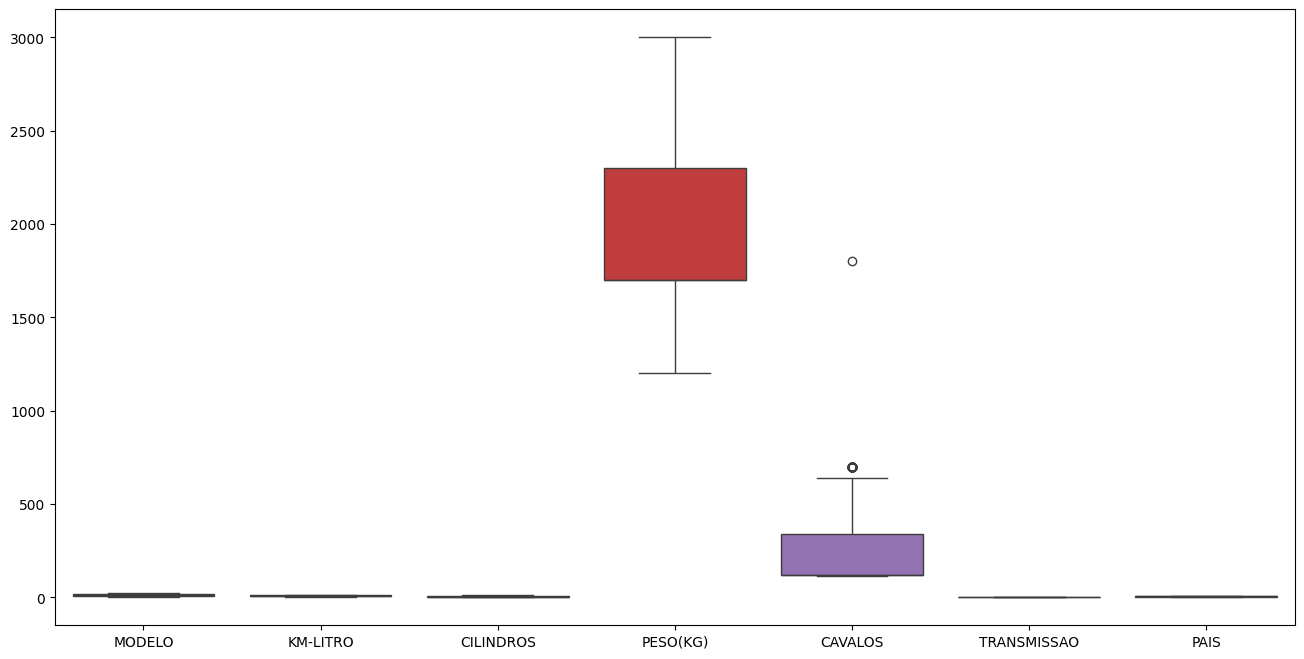

In [30]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_dados)

In [31]:
padronizar = StandardScaler().fit(df_dados)

df_padronizado = padronizar.transform(df_dados)

In [33]:
# o minmaxscaler faz o normalização coloca os numeros de 0 a 1, e o standscaler é padronizar, qual dos dois usar? usar aquele que dá os melhores resultados no modelo criado
df_padronizado = pd.DataFrame(df_padronizado)

df_padronizado.columns = df_dados.columns



In [34]:
df_padronizado

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,-0.522265
1,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.522972
2,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.174560
3,-0.767122,-1.401728,2.129491,-1.217384,1.801854,-0.916271,-0.173853
4,-1.714970,-1.267194,1.405714,-0.782162,1.706360,-0.916271,1.219797
5,0.338700,-0.998125,0.681936,-0.564552,1.037906,-0.916271,-1.567503
6,-0.293198,1.019891,-0.765618,-0.564552,-0.700076,-0.916271,-1.219090
7,0.812624,0.750822,-0.765618,-0.564552,-0.690526,1.091380,1.568209
8,1.444523,1.423494,-0.765618,-0.564552,-0.690526,1.091380,-0.870678
9,0.496675,1.558029,-0.765618,-0.564552,-0.690526,1.091380,0.871384


In [35]:
df_padronizado = pd.DataFrame(df_padronizado, columns = df_dados.columns)
df_padronizado.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,-0.522265
1,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.522972
2,0.180726,-1.401728,2.129491,-1.652605,2.088334,-0.916271,0.174560
3,-0.767122,-1.401728,2.129491,-1.217384,1.801854,-0.916271,-0.173853
4,-1.714970,-1.267194,1.405714,-0.782162,1.706360,-0.916271,1.219797


In [36]:
df_padronizado.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,9.860000e+02,9.840000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02,9.860000e+02
mean,1.171026e-17,-3.402879e-16,-1.981737e-17,2.071816e-17,9.908684e-17,-6.305526e-17,-1.076443e-16
std,1.000507e+00,1.000509e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00
min,-1.714970e+00,-1.401728e+00,-1.127507e+00,-1.652605e+00,-7.000757e-01,-9.162708e-01,-1.567503e+00
25%,-7.671224e-01,-9.981250e-01,-7.656185e-01,-5.645517e-01,-6.905263e-01,-9.162708e-01,-8.706777e-01
50%,1.807256e-01,-5.638414e-02,-7.656185e-01,-5.645517e-01,-6.905263e-01,-9.162708e-01,3.533594e-04
75%,8.126242e-01,7.508223e-01,6.819363e-01,7.411120e-01,3.694513e-01,1.091380e+00,8.713844e-01
max,1.602497e+00,1.558029e+00,2.129491e+00,2.264386e+00,7.340475e+00,1.091380e+00,1.568209e+00


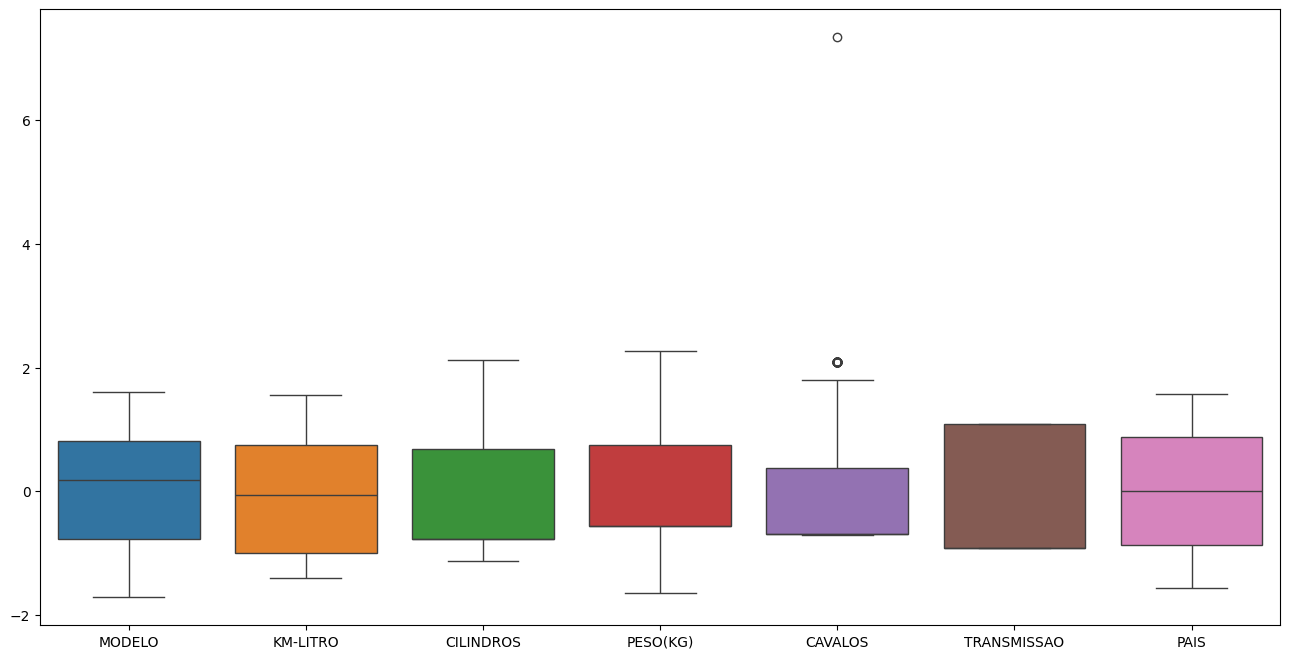

In [37]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_padronizado)

In [38]:
normalizar = MinMaxScaler().fit(df_dados)

In [39]:
df_normalizado = normalizar.transform(df_dados)

In [40]:
df_normalizado

array([[0.57142857, 0.        , 1.        , ..., 0.34679335, 0.        ,
        0.33333333],
       [0.57142857, 0.        , 1.        , ..., 0.34679335, 0.        ,
        0.66666667],
       [0.57142857, 0.        , 1.        , ..., 0.34679335, 0.        ,
        0.55555556],
       ...,
       [0.95238095, 0.95454545, 0.11111111, ..., 0.00118765, 1.        ,
        0.44444444],
       [0.66666667, 1.        , 0.11111111, ..., 0.00118765, 1.        ,
        0.88888889],
       [0.85714286, 0.45454545, 0.33333333, ..., 0.00118765, 1.        ,
        0.        ]], shape=(986, 7))

In [41]:
df_normalizado = pd.DataFrame(df_normalizado, columns=df_dados.columns)

In [42]:
df_normalizado.head()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
0,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.333333
1,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.666667
2,0.571429,0.000000,1.000000,0.000000,0.346793,0.0,0.555556
3,0.285714,0.000000,1.000000,0.111111,0.311164,0.0,0.444444
4,0.000000,0.045455,0.777778,0.222222,0.299287,0.0,0.888889


In [44]:
df_normalizado.describe()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
count,986.000000,984.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,0.516952,0.473596,0.346180,0.421907,0.087068,0.456389,0.499887
std,0.301588,0.338037,0.307187,0.255428,0.124433,0.498347,0.319069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.136364,0.111111,0.277778,0.001188,0.000000,0.222222
50%,0.571429,0.454545,0.111111,0.277778,0.001188,0.000000,0.500000
75%,0.761905,0.727273,0.555556,0.611111,0.133017,1.000000,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


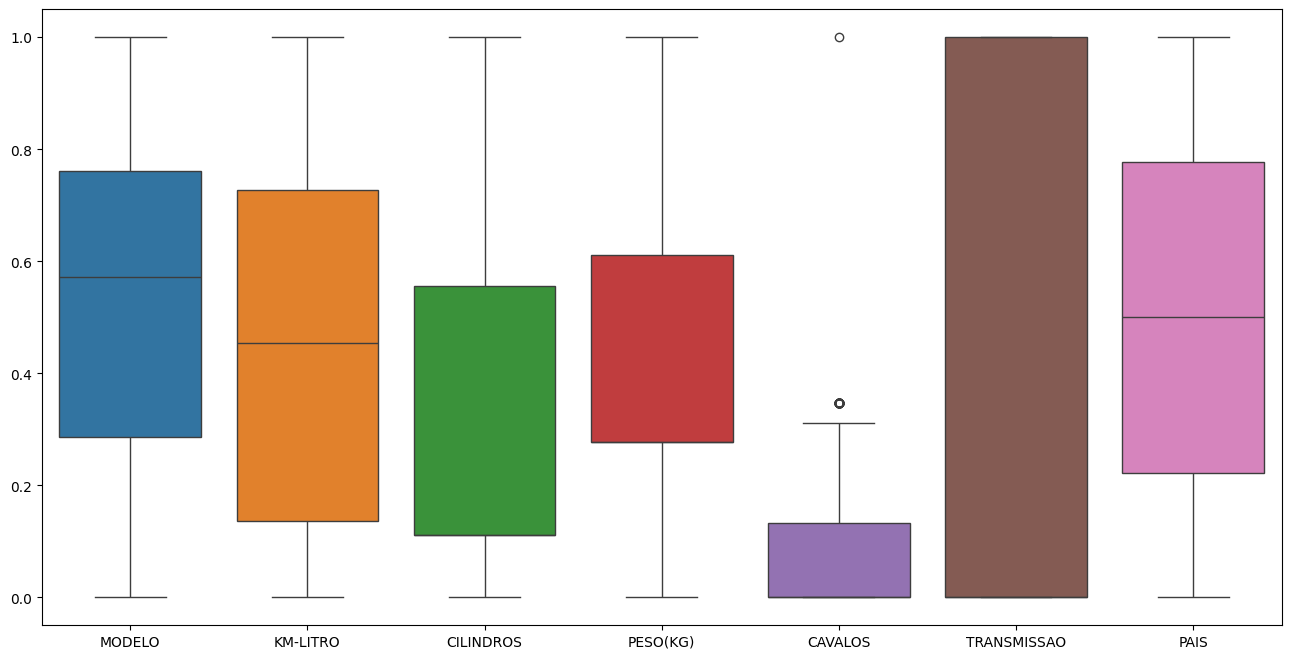

In [43]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(data=df_normalizado)

### Passo a passo da IA
---
- Reconhecer o problema 
- Analise exploratória (DEA)
    - plotagem visual dos dados(gráficos)
    - identificacao de valores nulos
- Tratamentos dos dados
    - tratar nulos
        - excluir(quanod não afeta significativamente o todo)
        - preencher com outros valores quando possível
            - media, mediana, moda, etc
    - tratar outliers
        - excluir
        - substituir o valor
        - *Nem todo valor é um outlier
- Engenharia de atributos
    - criar novas series a partir das séries já existentes
    - criar categorias
- Refazer os gráficos para entender
    - para entender como os dados estão ate aqui
- Conversao das variaveis categóricas em numéricas
- Entender a corelação dos dados
- Padronizar ou Normalizar os dados



In [ ]:
# df_dados (original)
# df_padronizaoo
# df_normalizado

In [45]:
df_dados.corr()

,MODELO,KM-LITRO,CILINDROS,PESO(KG),CAVALOS,TRANSMISSAO,PAIS
MODELO,1.000000,0.428497,-0.361893,-0.122851,-0.403278,0.607556,0.008756
KM-LITRO,0.428497,1.000000,-0.815090,0.034760,-0.788358,0.641490,-0.007238
CILINDROS,-0.361893,-0.815090,1.000000,-0.311150,0.924733,-0.626354,0.009733
PESO(KG),-0.122851,0.034760,-0.311150,1.000000,-0.382107,-0.121160,-0.013565
CAVALOS,-0.403278,-0.788358,0.924733,-0.382107,1.000000,-0.616357,0.018298
TRANSMISSAO,0.607556,0.641490,-0.626354,-0.121160,-0.616357,1.000000,0.006709
PAIS,0.008756,-0.007238,0.009733,-0.013565,0.018298,0.006709,1.000000


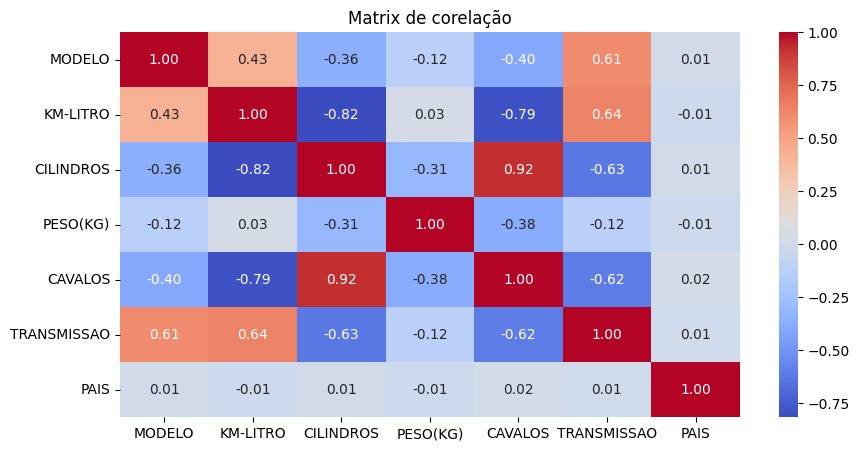

In [49]:
matrix = df_dados.corr()


plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrix de corelação')
plt.show()